<a href="https://colab.research.google.com/github/dilitha21/Distress-Signal-App/blob/main/Heart_attack_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 16: Detailed Analysis of Best Model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
y_pred = model_predictions[best_model_name]

print(f"\n=== DETAILED ANALYSIS OF BEST MODEL: {best_model_name} ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

if model_probabilities[best_model_name] is not None:
    try:
        roc_auc = roc_auc_score(y_test, model_probabilities[best_model_name])
        print(f"ROC-AUC Score: {roc_auc:.4f}")
    except:
        print("Could not calculate ROC-AUC score")

# Feature importance for the best model (if applicable)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()


=== DETAILED ANALYSIS OF BEST MODEL: Logistic Regression ===
Accuracy: 0.7050
ROC-AUC Score: 0.4654


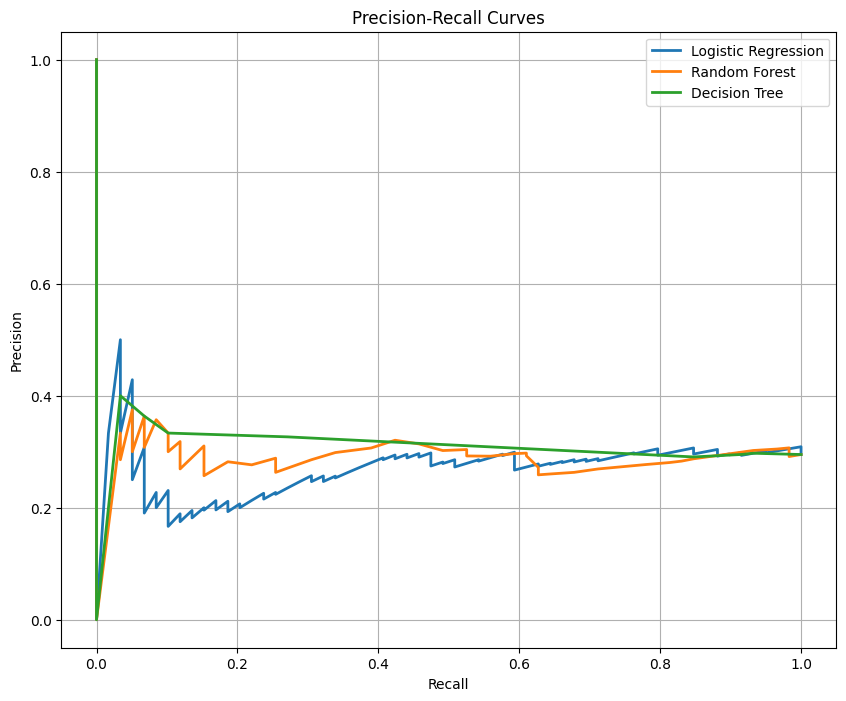

In [ ]:
# Cell 15: Precision-Recall Curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if model_probabilities[name] is not None:
        try:
            precision, recall, _ = precision_recall_curve(y_test, model_probabilities[name])
            plt.plot(recall, precision, label=name, linewidth=2)
        except Exception as e:
            print(f"Error plotting Precision-Recall curve for {name}: {e}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Cell 14: Classification Reports
for name, y_pred in model_predictions.items():
    print(f"\n=== {name} Classification Report ===")
    print(classification_report(y_test, y_pred))


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       141
           1       0.36      0.08      0.14        59

    accuracy                           0.69       200
   macro avg       0.53      0.51      0.47       200
weighted avg       0.61      0.69      0.61       200


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       141
           1       0.36      0.07      0.11        59

    accuracy                           0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


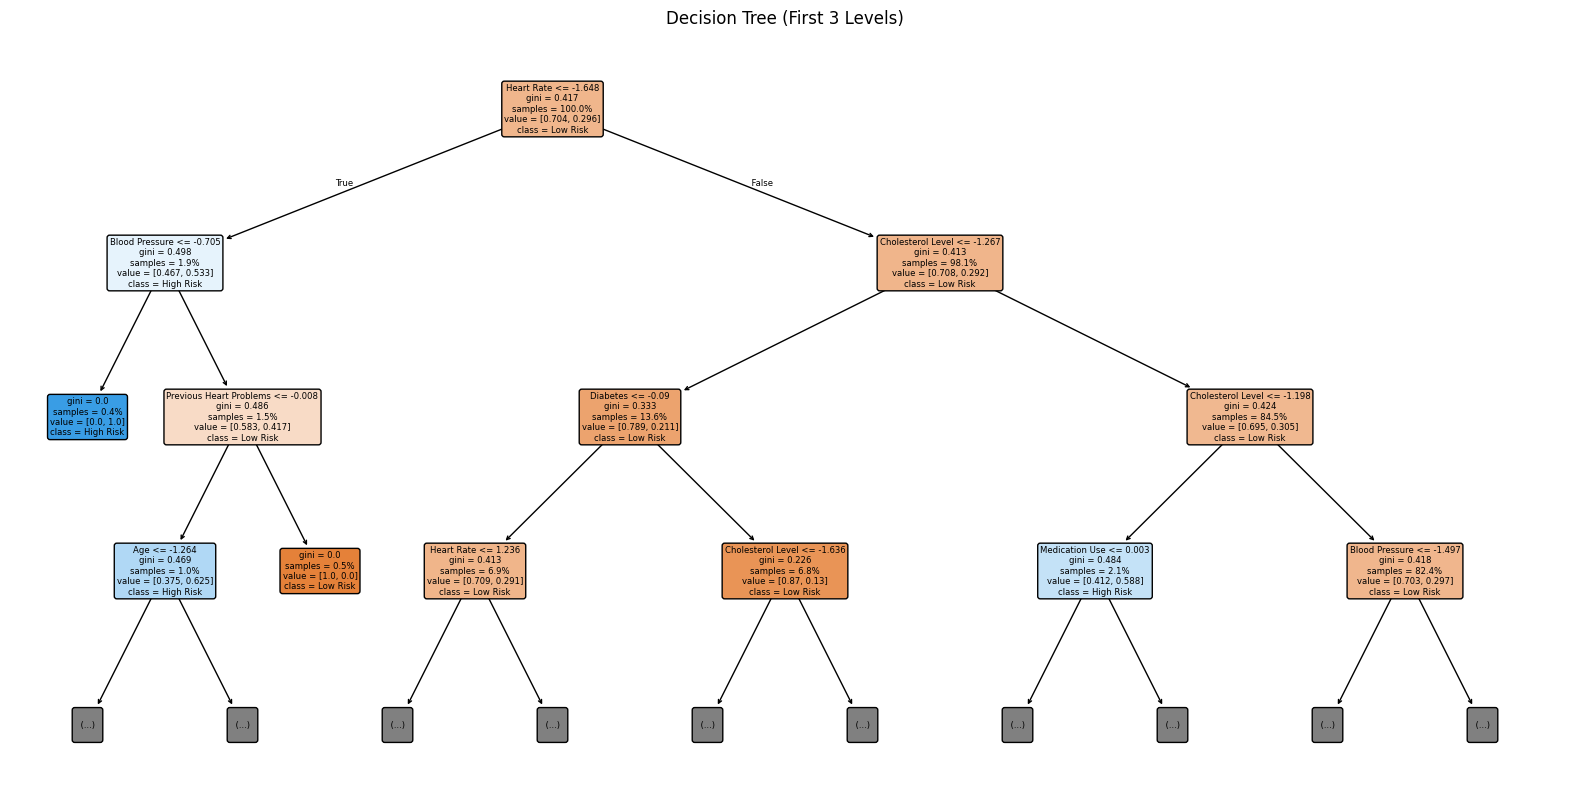

In [ ]:
# Cell 13: Decision Tree Visualization
if "Decision Tree" in models:
    plt.figure(figsize=(20, 10))
    plot_tree(models["Decision Tree"],
              feature_names=X.columns,
              class_names=['Low Risk', 'High Risk'],
              filled=True,
              rounded=True,
              proportion=True,
              max_depth=3)  # Show only first 3 levels for clarity
    plt.title("Decision Tree (First 3 Levels)")
    plt.show()

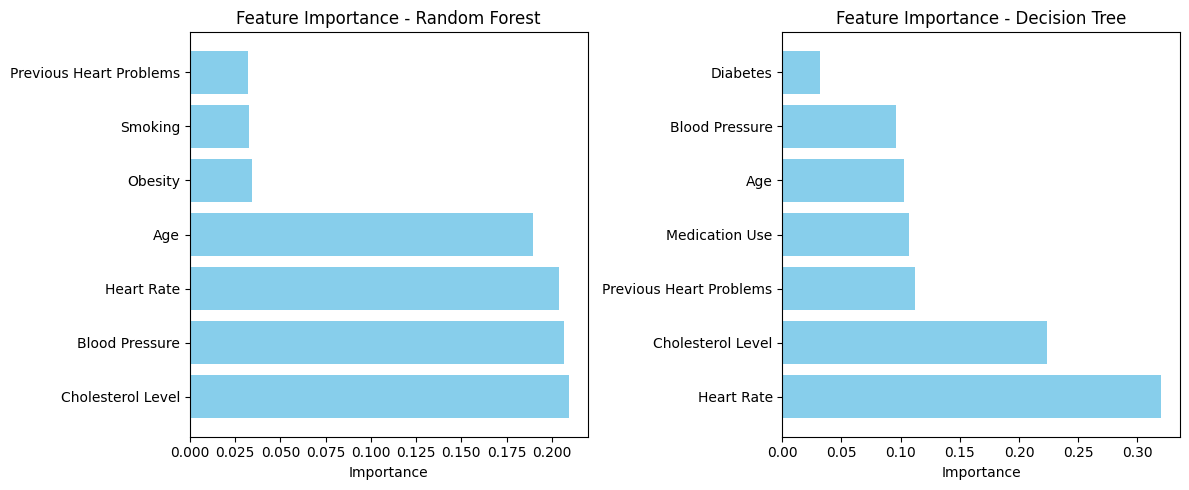

In [ ]:
# Cell 12: Feature Importance for Tree-Based Models
tree_models = {k: v for k, v in models.items() if hasattr(v, 'feature_importances_')}

if tree_models:
    fig, axes = plt.subplots(1, len(tree_models), figsize=(6*len(tree_models), 5))

    if len(tree_models) == 1:
        axes = [axes]  # Make it iterable if only one model

    for idx, (name, model) in enumerate(tree_models.items()):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        axes[idx].barh(feature_importance['feature'][:7], feature_importance['importance'][:7], color='skyblue')
        axes[idx].set_title(f'Feature Importance - {name}')
        axes[idx].set_xlabel('Importance')

    plt.tight_layout()
    plt.show()
else:
    print("No tree-based models available for feature importance visualization")

<Figure size 1000x800 with 0 Axes>

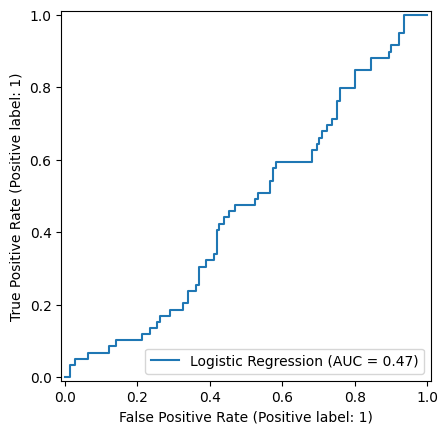

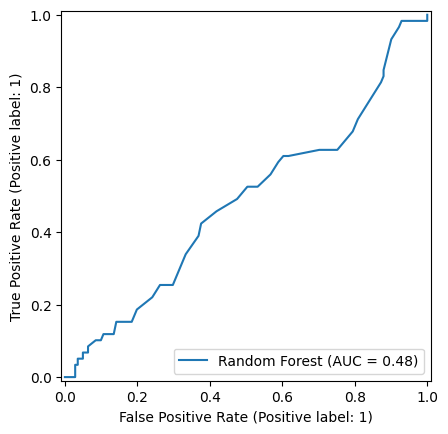

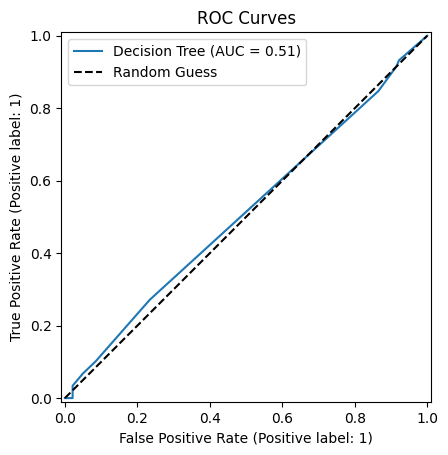

In [ ]:
# Cell 11: ROC Curves for Each Model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if model_probabilities[name] is not None:
        try:
            RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, name=name)
        except ValueError as e:
            print(f"Error plotting ROC curve for {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curves')
plt.legend()
plt.show()

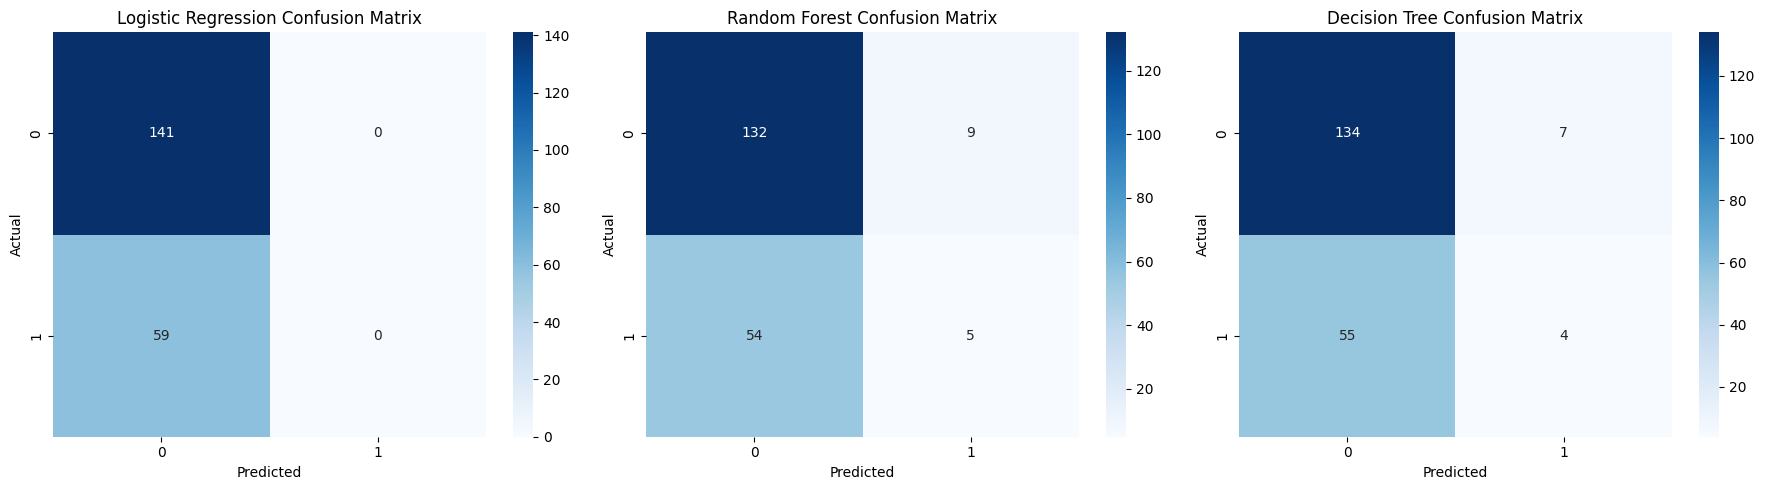

In [ ]:
# Cell 10: Confusion Matrices for Each Model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, y_pred) in enumerate(model_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

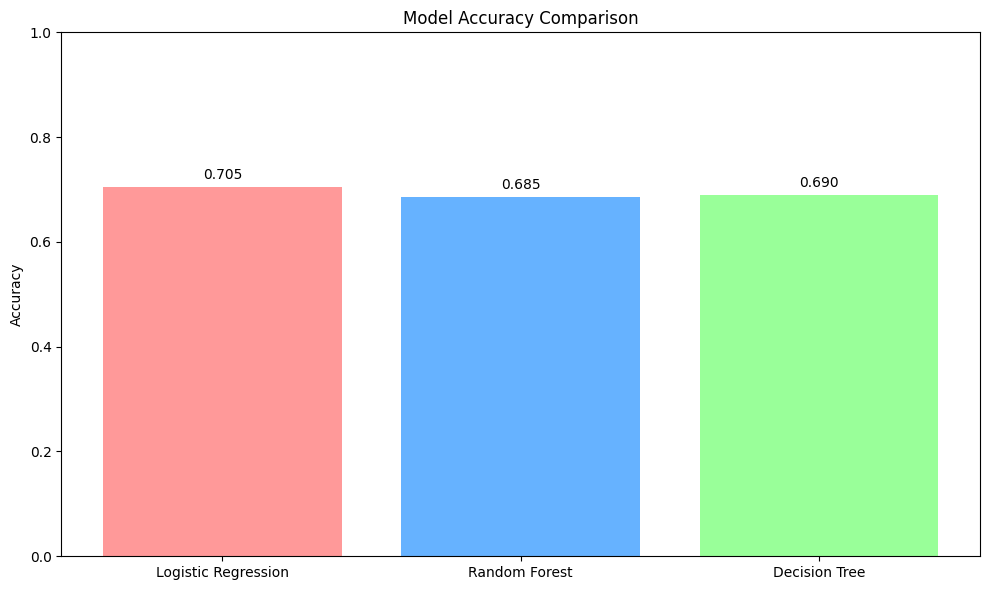

In [ ]:
# Cell 9: Model Accuracy Comparison Visualization
plt.figure(figsize=(10, 6))
models_list = list(model_scores.keys())
scores_list = list(model_scores.values())

bars = plt.bar(models_list, scores_list, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add value labels on top of each bar
for bar, score in zip(bars, scores_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Cell 8: Train Multiple Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5)
}

model_scores = {}
model_predictions = {}
model_probabilities = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Get prediction probabilities if available
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = None

    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy
    model_predictions[name] = y_pred
    model_probabilities[name] = y_pred_proba

    print(f"{name} Accuracy: {accuracy:.4f}")

# Compare model performance
print("\n=== MODEL COMPARISON ===")
for name, score in model_scores.items():
    print(f"{name}: {score:.4f}")


--- Training Logistic Regression ---
Logistic Regression Accuracy: 0.7050

--- Training Random Forest ---
Random Forest Accuracy: 0.6850

--- Training Decision Tree ---
Decision Tree Accuracy: 0.6900

=== MODEL COMPARISON ===
Logistic Regression: 0.7050
Random Forest: 0.6850
Decision Tree: 0.6900


In [ ]:
# Cell 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")

Feature scaling complete.


In [ ]:
# Cell 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set  - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (800, 10) Target: (800,)
Testing set  - Features: (200, 10) Target: (200,)


In [ ]:
# Cell 5: Split the Data into Features (X) and Target (y)
X = df_clean.drop('Heart Attack Risk', axis=1)
y = df_clean['Heart Attack Risk']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (1000, 10)
Target (y) shape: (1000,)


In [ ]:
# Cell 4: Data Preprocessing & Cleaning
df_clean = df.copy()

label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Smoking', 'Obesity', 'Diabetes', 'Previous Heart Problems', 'Medication Use']

for col in categorical_cols:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])

print("Data after encoding categorical text to numbers:")
df_clean.head()

Data after encoding categorical text to numbers:


,Age,Gender,Smoking,Obesity,Diabetes,Previous Heart Problems,Medication Use,Cholesterol Level,Blood Pressure,Heart Rate,Heart Attack Risk
0,68,1,1,0,1,0,0,277,137,82,1
1,58,1,0,1,1,1,0,206,128,61,0
2,44,1,1,1,0,1,1,201,120,108,0
3,72,0,1,0,1,1,1,286,99,83,0
4,37,1,0,0,0,1,1,260,119,99,1


=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Smoking                  1000 non-null   object
 3   Obesity                  1000 non-null   object
 4   Diabetes                 1000 non-null   object
 5   Previous Heart Problems  1000 non-null   object
 6   Medication Use           1000 non-null   object
 7   Cholesterol Level        1000 non-null   int64 
 8   Blood Pressure           1000 non-null   int64 
 9   Heart Rate               1000 non-null   int64 
 10  Heart Attack Risk        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB

=== STATISTICAL SUMMARY ===
               Age  Cholesterol Level  Blood Pressure  Heart Rate  \
count  1000.000000        1000.000000 

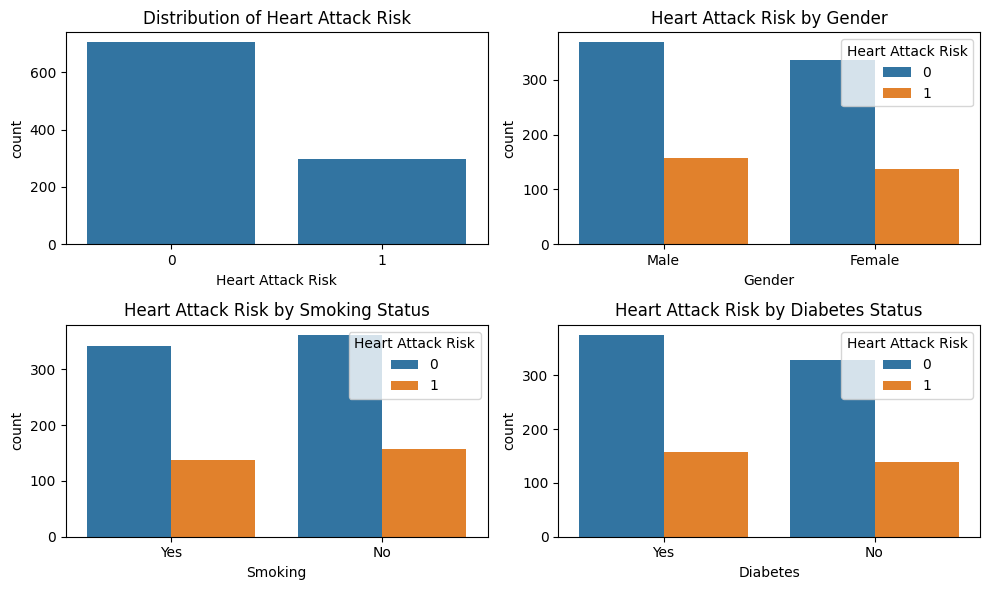

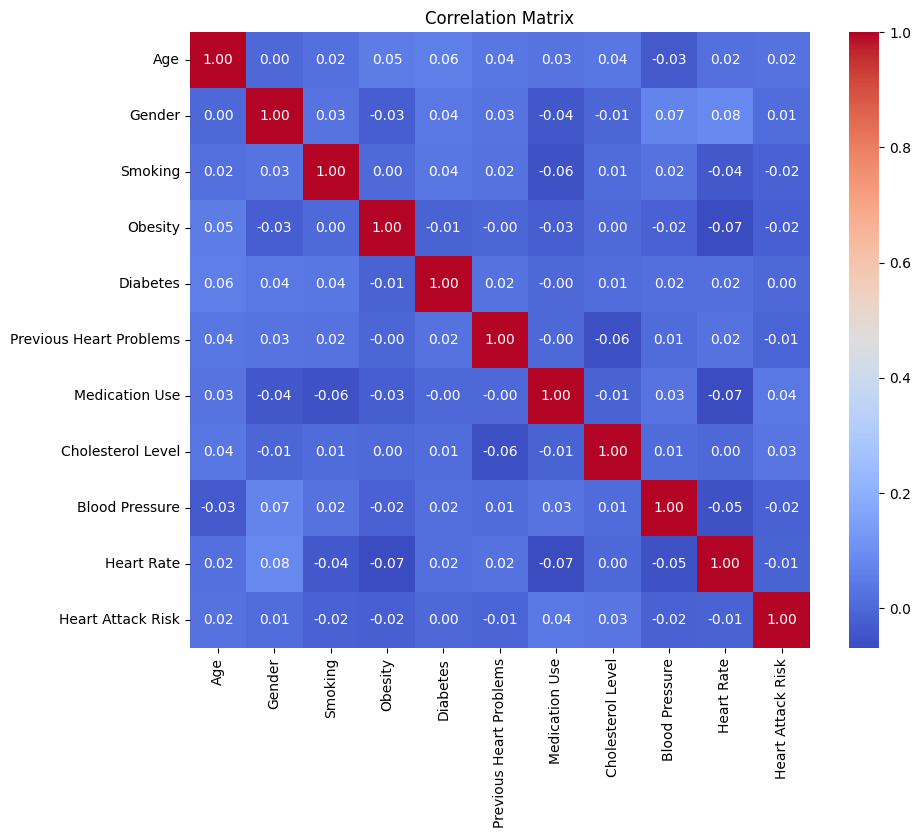


=== MISSING VALUES ===
Age                        0
Gender                     0
Smoking                    0
Obesity                    0
Diabetes                   0
Previous Heart Problems    0
Medication Use             0
Cholesterol Level          0
Blood Pressure             0
Heart Rate                 0
Heart Attack Risk          0
dtype: int64


In [ ]:
# Cell 3: Exploratory Data Analysis (EDA)
print("=== DATA INFO ===")
df.info()

print("\n=== STATISTICAL SUMMARY ===")
print(df.describe())

print("\n=== TARGET VARIABLE DISTRIBUTION ===")
risk_counts = df['Heart Attack Risk'].value_counts()
print(risk_counts)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Heart Attack Risk', data=df)
plt.title('Distribution of Heart Attack Risk')

plt.subplot(2, 2, 2)
sns.countplot(x='Gender', hue='Heart Attack Risk', data=df)
plt.title('Heart Attack Risk by Gender')

plt.subplot(2, 2, 3)
sns.countplot(x='Smoking', hue='Heart Attack Risk', data=df)
plt.title('Heart Attack Risk by Smoking Status')

plt.subplot(2, 2, 4)
sns.countplot(x='Diabetes', hue='Heart Attack Risk', data=df)
plt.title('Heart Attack Risk by Diabetes Status')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.copy()
# Convert categorical variables to numeric for correlation matrix
for col in ['Gender', 'Smoking', 'Obesity', 'Diabetes', 'Previous Heart Problems', 'Medication Use']:
    numeric_df[col] = LabelEncoder().fit_transform(numeric_df[col])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

In [ ]:
# Cell 2: Upload and load your dataset
from google.colab import files
uploaded = files.upload()

import io
file_name = next(iter(uploaded))  # Get the first (and likely only) file name from the dictionary
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Saving heart-attack-risk-prediction-dataset.csv to heart-attack-risk-prediction-dataset (4).csv
Dataset Shape: (1000, 11)

First 5 rows:


,Age,Gender,Smoking,Obesity,Diabetes,Previous Heart Problems,Medication Use,Cholesterol Level,Blood Pressure,Heart Rate,Heart Attack Risk
0,68,Male,Yes,No,Yes,No,No,277,137,82,1
1,58,Male,No,Yes,Yes,Yes,No,206,128,61,0
2,44,Male,Yes,Yes,No,Yes,Yes,201,120,108,0
3,72,Female,Yes,No,Yes,Yes,Yes,286,99,83,0
4,37,Male,No,No,No,Yes,Yes,260,119,99,1


In [ ]:
# Cell 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, RocCurveDisplay, precision_recall_curve)  # ADDED precision_recall_curve
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!
